In [1]:
%pprint

Pretty printing has been turned OFF


## 2016 Election Project
### Part 3 of Processing Pipeline

This notebook is intended to document analysis of my data throughout this project. The data I am starting out with are transcripts of the presidential debates from the 2016 US Election- the 10 Democratic primary debates, the 12 Republican primary debates, and the debates for the general election between Hillary Clinton and Donald Trump. The transcripts were taken from UCSB's American Presidency Project. The citations for these transcripts can be found in the README. Using these transcripts I'll analyze the referring expressions the candidates use for each other, try classifying utterance by each candidate, and perhaps a classifer to sort different types of referring expressions (i.e. female, male, professional).

In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import glob
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle

In [3]:
f = open('/Users/Paige/Documents/Data_Science/master_df.pkl', 'rb')
master_df = pickle.load(f)
f.close
master_df = master_df.reset_index(drop=True)
master_df.head()

,Date,Debate Type,Speaker,Sents,Tree
0,1-14-16,primary_rep,CAVUTO,It is 9:00 p.m. here at the North Charleston ...,"[(It, PRP), (is, VBZ), (9:00, CD), (p.m., NN),..."
1,1-14-16,primary_rep,CAVUTO,Welcome to the sixth Republican presidential o...,"[(Welcome, VB), (to, TO), (the, DT), (sixth, J..."
2,1-14-16,primary_rep,CAVUTO,"I'm Neil Cavuto, alongside my friend and co-mo...","[(I, PRP), ('m, VBP), [(Neil, JJ), (Cavuto, NN..."
3,1-14-16,primary_rep,BARTIROMO,Tonight we are working with Facebook to ask t...,"[(Tonight, NN), (we, PRP), (are, VBP), (workin..."
4,1-14-16,primary_rep,BARTIROMO,"And according to Facebook, the U.S. election h...","[(And, CC), (according, VBG), (to, TO), [(Face..."


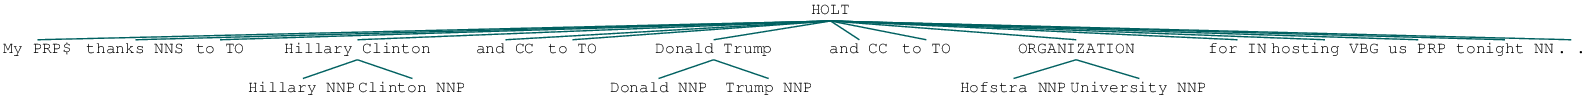

In [4]:
master_df.iloc[-2][-1]

**Here is a distribution across the candidates that remained in the race until the last primary debate.**

In [5]:
ner_categories = defaultdict(int)

# Create the nested for loop
for tree in master_df['Tree']:
    for chunk in tree:
        if hasattr(chunk, 'label') and chunk.label() not in ['GPE', 'ORGANIZATION', 'PERSON', 'LOCATION', 'GSP', 'FACILITY' ]:
            ner_categories[chunk.label()] += 1
     
for category in sorted(ner_categories, key=ner_categories.get, reverse=True):
    print(category, ner_categories[category])

Hillary Clinton 1095
Donald Trump 973
Barack Obama 544
Bernie Sanders 535
Marco Rubio 350
Ted Cruz 319
Jeb Bush 286
TITLE 231
Chris Christie 212
Ben Carson 204
John Kasich 165
Ronald Reagan 146
Bashar al-Assad 137
Rand Paul 126
Martin O'Malley 116
Vladimir Putin 105
Carly Fiorina 85
Dana Bash 66
Jake Tapper 66
Anderson Cooper 65
Wolf Blitzer 59
David Muir 50
Maria Celeste Arraras 46
John Kerry 46
Muammar Gaddafi 46
Martha Raddatz 45
Mike Huckabee 43
Bill Clinton 42
Megyn Kelly 41
Jim Webb 38
Antonin Scalia 35
Lester Holt 32
Scott Walker 30
Bret Baier 29
Neil Cavuto 28
James Carter 28
Saddam Hussein 28
Mitt Romney 27
Andrea Mitchell 19
Don Lemon 18
Osama bin Laden 18
Nancy Pelosi 17
John Kennedy 17
Joe Biden 16
Chuck Schumer 16
Edward Snowden 16
Carl Quintanilla 13
John McCain 12
Sean Hannity 12
Rachel Maddow 12
Lindsey Graham 11
Nikki Haley 10
Lincoln Chafee 10
Rick Santorum 10
Benjamin Netanyahu 10
Elizabeth Warren 9
Theodore Roosevelt 8
John Adams 8
Fidel Castro 8
Chuck Todd 7
James 

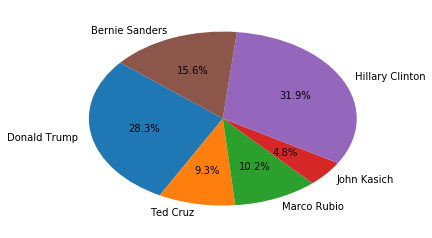

In [6]:
#This section is with help from a datacamp tutorial
#https://campus.datacamp.com/courses/natural-language-processing-fundamentals-in-python/named-entity-recognition?ex=3

ner_categories = defaultdict(int)

# Create the nested for loop
for tree in master_df['Tree']:
    for chunk in tree:
        if hasattr(chunk, 'label'):
            if chunk.label() in ['Hillary Clinton', 'Donald Trump', 'Bernie Sanders', 'Ted Cruz', 'Marco Rubio', 'John Kasich']:
                ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

**Let's build a data frame for each speaker with only their utterances in it.**

In [7]:
#There are 81 different speakers
speaker_counts = master_df['Speaker'].value_counts()
speaker_counts.size

82

In [8]:
#These are the top 20 speakers who had the most utterances. A larger count doesn't necissarilly 
#mean a speaker spoke for more time than another, just that they used more sentences.
speaker_counts[:20]

TRUMP        5997
CLINTON      4903
SANDERS      3546
RUBIO        2602
CRUZ         2117
KASICH       1970
BUSH         1461
OMALLEY      1076
CHRISTIE     1018
CARSON        971
COOPER        790
BLITZER       755
PAUL          752
TAPPER        677
WALLACE       655
FIORINA       614
KELLY         493
MUIR          488
DICKERSON     481
HOLT          420
Name: Speaker, dtype: int64

In [9]:
speakers = list(speaker_counts.index)
speakers

['TRUMP', 'CLINTON', 'SANDERS', 'RUBIO', 'CRUZ', 'KASICH', 'BUSH', 'OMALLEY', 'CHRISTIE', 'CARSON', 'COOPER', 'BLITZER', 'PAUL', 'TAPPER', 'WALLACE', 'FIORINA', 'KELLY', 'MUIR', 'DICKERSON', 'HOLT', 'BAIER', 'RADDATZ', 'CUOMO', 'BASH', 'HUCKABEE', 'BARTIROMO', 'CAVUTO', 'WALKER', 'HEWITT', 'QUESTION', 'TODD', 'WEBB', 'QUINTANILLA', 'CHAFEE', 'QUICK', 'HARWOOD', 'SALINAS', 'MADDOW', 'RAMOS', 'BAKER', 'WOODRUFF', 'IFILL', 'MITCHELL', 'TUMULTY', 'LEMON', 'ARRARÁS', 'GARRETT', 'LOUIS', 'CORDES', 'MCELVEEN', 'HAM', 'DINAN', 'STRASSEL', 'UNKNOWN', 'COONEY', 'LOPEZ', 'EPPERSON', 'OBRADOVICH', 'SANTELLI', 'CRAMER', 'ANNOUNCER', 'LEVESQUE', 'GOODSON', 'BROWNLEE', 'BISHOP', 'FRANTA', 'MODERATOR', 'PERRY', 'PANELISTS', 'CRAWFORD', 'LASSEN', 'SMITH', 'PLUMMER', 'WILKINS', 'ClINTON', 'AUDIENCE', 'ALEXIS', 'ROSENGREN', 'COLLISON', 'HANNITY', 'UNIDENTIFIABLE', 'MALE']

In [10]:
'SANTORUM' in speakers

False

In [11]:
speaker_dfs = []
for speaker in speakers:
    df = master_df.loc[master_df['Speaker']==speaker, :]
    speaker_dfs.append(df)

In [12]:
speaker_dfs[0].head()

,Date,Debate Type,Speaker,Sents,Tree
170,1-14-16,primary_rep,TRUMP,"It's not fear and terror, it's reality.","[(It, PRP), ('s, VBZ), (not, RB), (fear, JJ), ..."
171,1-14-16,primary_rep,TRUMP,"You just have to look today at Indonesia, bomb...","[(You, PRP), (just, RB), (have, VBP), (to, TO)..."
172,1-14-16,primary_rep,TRUMP,"[applause]\n\nYou look at California, you look...","[([, NN), (applause, NN), (], NNP), (You, PRP)..."
173,1-14-16,primary_rep,TRUMP,"They're very, very badly wounded.","[(They, PRP), ('re, VBP), (very, RB), (,, ,), ..."
174,1-14-16,primary_rep,TRUMP,They will — some will follow.,"[(They, PRP), (will, MD), (—, VB), (some, DT),..."


In [13]:
speaker_dfs[0].tail()

,Date,Debate Type,Speaker,Sents,Tree
37043,9-26-16,general,TRUMP,I want to make America great again.,"[(I, PRP), (want, VBP), (to, TO), (make, VB), ..."
37044,9-26-16,general,TRUMP,I'm going to be able to do it.,"[(I, PRP), ('m, VBP), (going, VBG), (to, TO), ..."
37045,9-26-16,general,TRUMP,I don't believe Hillary will.,"[(I, PRP), (do, VBP), (n't, RB), (believe, VB)..."
37046,9-26-16,general,TRUMP,"The answer is, if she wins, I will absolutely ...","[(The, DT), (answer, NN), (is, VBZ), (,, ,), (..."
37047,9-26-16,general,TRUMP,[applause],"[([, NN), (applause, NN), (], NN)]"


In [14]:
speaker_dfs[1].head()

,Date,Debate Type,Speaker,Sents,Tree
1617,1-17-16,primary_dem,CLINTON,"Well, good evening.","[(Well, RB), (,, ,), (good, JJ), (evening, NN)..."
1618,1-17-16,primary_dem,CLINTON,And I want to thank the Congressional Black Ca...,"[(And, CC), (I, PRP), (want, VBP), (to, TO), (..."
1619,1-17-16,primary_dem,CLINTON,"You know, I remember well when my youth minist...","[(You, PRP), (know, VBP), (,, ,), (I, PRP), (r..."
1620,1-17-16,primary_dem,CLINTON,I was a teenager.,"[(I, PRP), (was, VBD), (a, DT), (teenager, NN)..."
1621,1-17-16,primary_dem,CLINTON,"And his moral clarity, the message that he con...","[(And, CC), (his, PRP$), (moral, JJ), (clarity..."


In [15]:
speaker_dfs[1].tail()

,Date,Debate Type,Speaker,Sents,Tree
37025,9-26-16,general,CLINTON,"And sometimes you win, sometimes you lose.","[(And, CC), (sometimes, RB), (you, PRP), (win,..."
37026,9-26-16,general,CLINTON,But I certainly will support the outcome of th...,"[(But, CC), (I, PRP), (certainly, RB), (will, ..."
37027,9-26-16,general,CLINTON,And I know Donald's trying very hard to plant ...,"[(And, CC), (I, PRP), (know, VBP), [(Donald, N..."
37028,9-26-16,general,CLINTON,It's not about us so much as it is about you a...,"[(It, PRP), ('s, VBZ), (not, RB), (about, IN),..."
37029,9-26-16,general,CLINTON,So I sure hope you will get out and vote as th...,"[(So, RB), (I, PRP), (sure, VBP), (hope, VBP),..."


**First, let's focus on the candidates. The ultimate goal of this project is to focus on the referring expressions Hillary Clinton and Donald Trump use for each other, but analyzing how they refer to other candidates, and other candidates them can be helpful in comparison.**

In [16]:
trump = speaker_dfs[0]
clinton = speaker_dfs[1]
sanders = speaker_dfs[2]
rubio = speaker_dfs[3]
cruz = speaker_dfs[4]
kasich = speaker_dfs[5]
bush = speaker_dfs[6]
omalley = speaker_dfs[7]
christie = speaker_dfs[8]
carson = speaker_dfs[9]
paul = speaker_dfs[12]
fiorina = speaker_dfs[15]
huckabee = speaker_dfs[24]
walker = speaker_dfs[27]
webb = speaker_dfs[31]
chafee = speaker_dfs[33]


In [17]:
trump.head()

,Date,Debate Type,Speaker,Sents,Tree
170,1-14-16,primary_rep,TRUMP,"It's not fear and terror, it's reality.","[(It, PRP), ('s, VBZ), (not, RB), (fear, JJ), ..."
171,1-14-16,primary_rep,TRUMP,"You just have to look today at Indonesia, bomb...","[(You, PRP), (just, RB), (have, VBP), (to, TO)..."
172,1-14-16,primary_rep,TRUMP,"[applause]\n\nYou look at California, you look...","[([, NN), (applause, NN), (], NNP), (You, PRP)..."
173,1-14-16,primary_rep,TRUMP,"They're very, very badly wounded.","[(They, PRP), ('re, VBP), (very, RB), (,, ,), ..."
174,1-14-16,primary_rep,TRUMP,They will — some will follow.,"[(They, PRP), (will, MD), (—, VB), (some, DT),..."


In [18]:
clinton.head()

,Date,Debate Type,Speaker,Sents,Tree
1617,1-17-16,primary_dem,CLINTON,"Well, good evening.","[(Well, RB), (,, ,), (good, JJ), (evening, NN)..."
1618,1-17-16,primary_dem,CLINTON,And I want to thank the Congressional Black Ca...,"[(And, CC), (I, PRP), (want, VBP), (to, TO), (..."
1619,1-17-16,primary_dem,CLINTON,"You know, I remember well when my youth minist...","[(You, PRP), (know, VBP), (,, ,), (I, PRP), (r..."
1620,1-17-16,primary_dem,CLINTON,I was a teenager.,"[(I, PRP), (was, VBD), (a, DT), (teenager, NN)..."
1621,1-17-16,primary_dem,CLINTON,"And his moral clarity, the message that he con...","[(And, CC), (his, PRP$), (moral, JJ), (clarity..."


In [19]:
sanders.head()

,Date,Debate Type,Speaker,Sents,Tree
1632,1-17-16,primary_dem,SANDERS,Thank you.,"[(Thank, NNP), (you, PRP), (., .)]"
1633,1-17-16,primary_dem,SANDERS,As we honor the extraordinary life of Dr. Mart...,"[(As, IN), (we, PRP), (honor, VBP), (the, DT),..."
1634,1-17-16,primary_dem,SANDERS,"As we look out at our country today, what the ...","[(As, IN), (we, PRP), (look, VBP), (out, RP), ..."
1635,1-17-16,primary_dem,SANDERS,"And then, to make a bad situation worse, we ha...","[(And, CC), (then, RB), (,, ,), (to, TO), (mak..."
1636,1-17-16,primary_dem,SANDERS,This campaign is about a political revolution ...,"[(This, DT), (campaign, NN), (is, VBZ), (about..."


In [20]:
rubio.head()

,Date,Debate Type,Speaker,Sents,Tree
133,1-14-16,primary_rep,RUBIO,"Yeah, I would go, first of all, one step furt...","[(Yeah, UH), (,, ,), (I, PRP), (would, MD), (g..."
134,1-14-16,primary_rep,RUBIO,"She wouldn't just be a disaster, Hillary Clint...","[(She, PRP), (would, MD), (n't, RB), (just, RB..."
135,1-14-16,primary_rep,RUBIO,[applause]\n\nSomeone who cannot handle intell...,"[([, NN), (applause, NN), (], NNP), (Someone, ..."
136,1-14-16,primary_rep,RUBIO,Ever.,"[(Ever, RB), (., .)]"
137,1-14-16,primary_rep,RUBIO,"[applause]\n\nOn the issue of Barack Obama, Ba...","[([, NN), (applause, NN), (], NN), (On, IN), (..."


In [21]:
cruz.head()

,Date,Debate Type,Speaker,Sents,Tree
25,1-14-16,primary_rep,CRUZ,"Well, Maria, thank you for that question, and...","[(Well, RB), (,, ,), [(Maria, NNP)], (,, ,), (..."
26,1-14-16,primary_rep,CRUZ,Let me start — I want to get to the substance ...,"[(Let, VB), (me, PRP), (start, VB), (—, FW), (..."
27,1-14-16,primary_rep,CRUZ,"Today, many of us picked up our newspapers, an...","[(Today, NN), (,, ,), (many, JJ), (of, IN), (u..."
28,1-14-16,primary_rep,CRUZ,"In that State of the Union, President Obama di...","[(In, IN), (that, DT), (State, NNP), (of, IN),..."
29,1-14-16,primary_rep,CRUZ,President Obama's preparing to send $100 billi...,"[[(President, NNP), (Obama, NNP)], ('s, POS), ..."


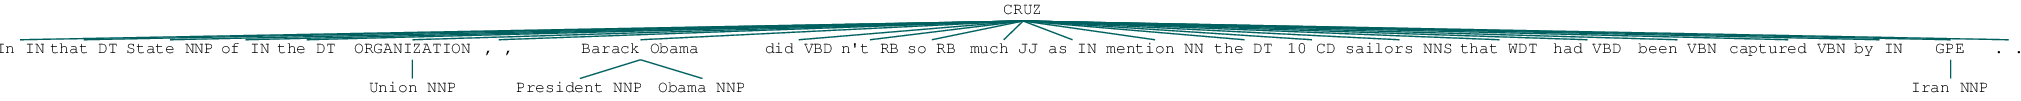

In [58]:
master_df.loc[28]['Tree']

In [22]:
kasich.head()

,Date,Debate Type,Speaker,Sents,Tree
48,1-14-16,primary_rep,KASICH,"Look, it takes three things basically to grow...","[[(Look, NN)], (,, ,), (it, PRP), (takes, VBZ)..."
49,1-14-16,primary_rep,KASICH,And I've done it when I was in Washington when...,"[(And, CC), (I, PRP), ('ve, VBP), (done, VBN),..."
50,1-14-16,primary_rep,KASICH,And our economy was growing like crazy.,"[(And, CC), (our, PRP$), (economy, NN), (was, ..."
51,1-14-16,primary_rep,KASICH,It's the same thing that I did in Ohio.,"[(It, PRP), ('s, VBZ), (the, DT), (same, JJ), ..."
52,1-14-16,primary_rep,KASICH,It's a simple formula: common sense regulation...,"[(It, PRP), ('s, VBZ), (a, DT), (simple, JJ), ..."


In [23]:
bush.head()

,Date,Debate Type,Speaker,Sents,Tree
103,1-14-16,primary_rep,BUSH,"Well first of all, the idea that somehow we'r...","[(Well, NNP), (first, RB), (of, IN), (all, DT)..."
104,1-14-16,primary_rep,BUSH,The simple fact is that the world has been tor...,"[(The, DT), (simple, JJ), (fact, NN), (is, VBZ..."
105,1-14-16,primary_rep,BUSH,Think about it.,"[(Think, VBP), (about, IN), (it, PRP), (., .)]"
106,1-14-16,primary_rep,BUSH,"With grandiose language, the president talks a...","[(With, IN), (grandiose, JJ), (language, NN), ..."
107,1-14-16,primary_rep,BUSH,"He's missing the whole point, that America's l...","[(He, PRP), ('s, VBZ), (missing, VBG), (the, D..."


In [24]:
omalley.head()

,Date,Debate Type,Speaker,Sents,Tree
1639,1-17-16,primary_dem,OMALLEY,Thank you.,"[(Thank, NNP), (you, PRP), (., .)]"
1640,1-17-16,primary_dem,OMALLEY,"My name is Martin O'Malley, I was born the yea...","[(My, PRP$), (name, NN), (is, VBZ), [(Martin, ..."
1641,1-17-16,primary_dem,OMALLEY,And I want to thank the people of South Caroli...,"[(And, CC), (I, PRP), (want, VBP), (to, TO), (..."
1642,1-17-16,primary_dem,OMALLEY,"You taught us, in fact, in keeping with Dr. Ki...","[(You, PRP), (taught, VBP), (us, PRP), (,, ,),..."
1643,1-17-16,primary_dem,OMALLEY,"Eight years ago, you brought forward a new lea...","[(Eight, CD), (years, NNS), (ago, RB), (,, ,),..."


In [25]:
christie.head()

,Date,Debate Type,Speaker,Sents,Tree
76,1-14-16,primary_rep,CHRISTIE,"Well, Maria, I'm glad to have heard from you ...","[(Well, RB), (,, ,), [(Maria, NNP)], (,, ,), (..."
77,1-14-16,primary_rep,CHRISTIE,"Because Tuesday night, I watched story time wi...","[(Because, IN), (Tuesday, NNP), (night, NN), (..."
78,1-14-16,primary_rep,CHRISTIE,"And I've got to tell you, it sounded like ever...","[(And, CC), (I, PRP), ('ve, VBP), (got, VBN), ..."
79,1-14-16,primary_rep,CHRISTIE,"[applause]\n\nThe fact is, there's a number of...","[([, NN), (applause, NN), (], VBZ), (The, DT),..."
80,1-14-16,primary_rep,CHRISTIE,The first thing is we have to strengthen our a...,"[(The, DT), (first, JJ), (thing, NN), (is, VBZ..."


In [26]:
carson.head()

,Date,Debate Type,Speaker,Sents,Tree
150,1-14-16,primary_rep,CARSON,"Well, I'm very happy to get a question this e...","[(Well, RB), (,, ,), (I, PRP), ('m, VBP), (ver..."
151,1-14-16,primary_rep,CARSON,I was going to ask you to wake me up when that...,"[(I, PRP), (was, VBD), (going, VBG), (to, TO),..."
152,1-14-16,primary_rep,CARSON,"[laughter]\n\nYou know, I find it really quite...","[([, JJ), (laughter, NN), (], NNP), (You, PRP)..."
153,1-14-16,primary_rep,CARSON,The fact of the matter is he doesn't realize t...,"[(The, DT), (fact, NN), (of, IN), (the, DT), (..."
154,1-14-16,primary_rep,CARSON,Not armies massively marching on each other an...,"[(Not, RB), (armies, NNS), (massively, RB), (m..."


In [27]:
paul.head()

,Date,Debate Type,Speaker,Sents,Tree
4168,1-28-16,primary_rep,PAUL,"You know, I've always had a great deal of res...","[(You, PRP), (know, VBP), (,, ,), (I, PRP), ('..."
4169,1-28-16,primary_rep,PAUL,There's probably no person I respect more in t...,"[(There, EX), ('s, VBZ), (probably, RB), (no, ..."
4170,1-28-16,primary_rep,PAUL,I think he was probably the most honest man in...,"[(I, PRP), (think, VBP), (he, PRP), (was, VBD)..."
4171,1-28-16,primary_rep,PAUL,And so in no way have I ever said that I don't...,"[(And, CC), (so, RB), (in, IN), (no, DT), (way..."
4172,1-28-16,primary_rep,PAUL,I think what's interesting about where that li...,"[(I, PRP), (think, VBP), (what, WP), ('s, VBZ)..."


In [28]:
fiorina.head()

,Date,Debate Type,Speaker,Sents,Tree
8411,10-28-15,primary_rep,FIORINA,"Well, gee, after the last debate, I was told ...","[(Well, RB), (,, ,), (gee, NNS), (,, ,), (afte..."
8412,10-28-15,primary_rep,FIORINA,[laughter],"[([, JJ), (laughter, NN), (], NN)]"
8414,10-28-15,primary_rep,FIORINA,But I also think that these are very serious ...,"[(But, CC), (I, PRP), (also, RB), (think, VBP)..."
8415,10-28-15,primary_rep,FIORINA,I agree with them.,"[(I, PRP), (agree, VBP), (with, IN), (them, PR..."
8416,10-28-15,primary_rep,FIORINA,"And this big powerful, corrupt bureaucracy wor...","[(And, CC), (this, DT), (big, JJ), (powerful, ..."


In [51]:
huckabee.head()

,Date,Debate Type,Speaker,Sents,Tree
8373,10-28-15,primary_rep,HUCKABEE,"Well, John, I don't really have any weaknesse...","[(Well, RB), (,, ,), [(John, NNP)], (,, ,), (I..."
8374,10-28-15,primary_rep,HUCKABEE,[laughter]\n\nBut my wife is down here in the ...,"[([, JJ), (laughter, NN), (], NN), (But, CC), ..."
8375,10-28-15,primary_rep,HUCKABEE,"If I have a weakness, it's that I try to live ...","[(If, IN), (I, PRP), (have, VBP), (a, DT), (we..."
8376,10-28-15,primary_rep,HUCKABEE,"I try to live by the rules, no matter what the...","[(I, PRP), (try, VBP), (to, TO), (live, VB), (..."
8377,10-28-15,primary_rep,HUCKABEE,Play by the rules.,"[[(Play, NN)], (by, IN), (the, DT), (rules, NN..."


In [50]:
walker.head()

,Date,Debate Type,Speaker,Sents,Tree
31880,8-6-15,primary_rep,WALKER,"Well, I'm pro-life, I've always been pro-life...","[(Well, RB), (,, ,), (I, PRP), ('m, VBP), (pro..."
31881,8-6-15,primary_rep,WALKER,That's been consistently proven.,"[(That, DT), ('s, VBZ), (been, VBN), (consiste..."
31882,8-6-15,primary_rep,WALKER,"Unlike Hillary Clinton, who has a radical posi...","[(Unlike, IN), [(Hillary, NNP), (Clinton, NNP)..."
31883,8-6-15,primary_rep,WALKER,[applause],"[([, NN), (applause, NN), (], NN)]"
32040,8-6-15,primary_rep,WALKER,"Chris, I actually said that on your show earl...","[[(Chris, NNP)], (,, ,), (I, PRP), (actually, ..."


In [49]:
webb.head()

,Date,Debate Type,Speaker,Sents,Tree
5489,10-13-15,primary_dem,WEBB,Thank you.,"[(Thank, NNP), (you, PRP), (., .)]"
5490,10-13-15,primary_dem,WEBB,"You know, people are disgusted with the way th...","[(You, PRP), (know, VBP), (,, ,), (people, NNS..."
5491,10-13-15,primary_dem,WEBB,They're looking for a leader who understands h...,"[(They, PRP), ('re, VBP), (looking, VBG), (for..."
5492,10-13-15,primary_dem,WEBB,I have a record of working across the politica...,"[(I, PRP), (have, VBP), (a, DT), (record, NN),..."
5493,10-13-15,primary_dem,WEBB,I've also spent more than half of my professio...,"[(I, PRP), ('ve, VBP), (also, RB), (spent, VBN..."


In [48]:
chafee.head()

,Date,Debate Type,Speaker,Sents,Tree
5465,10-13-15,primary_dem,CHAFEE,"Thank you, Anderson.","[(Thank, NNP), (you, PRP), (,, ,), [(Anderson,..."
5466,10-13-15,primary_dem,CHAFEE,"Thank you, CNN, and thank you Facebook for org...","[(Thank, NNP), (you, PRP), (,, ,), [(CNN, NNP)..."
5467,10-13-15,primary_dem,CHAFEE,Not only will Americans be electing a new pres...,"[(Not, RB), (only, RB), (will, MD), (Americans..."
5468,10-13-15,primary_dem,CHAFEE,Voters should assess the candidate's experienc...,"[(Voters, NNS), (should, MD), (assess, VB), (t..."
5469,10-13-15,primary_dem,CHAFEE,I'm the only one running for president that ha...,"[(I, PRP), ('m, VBP), (the, DT), (only, JJ), (..."
